<a href="https://colab.research.google.com/github/galacticism/Predicting-Recidivism-With-Machine-Learning-An-Analysis-of-Risk-Factors/blob/main/Gradient-Boosted%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots

from sklearn.tree import DecisionTreeClassifier
#LEARN: https://www.geeksforgeeks.org/python-programming-language/
# https://docs.google.com/document/d/1XyanC0V43nmhqsq74aDddzy2AVuQG9PyEwBO0e0f_RE/edit#heading=h.bkwak51mcems
#https://seaborn.pydata.org/generated/seaborn.lineplot.html

#Good read https://nij.ojp.gov/topics/articles/results-national-institute-justice-recidivism-forecasting-challenge#papers-from-the-winners
#PUMA http://proximityone.com/puma/puma2010ga.htm

# Georgia Recidivism Dataset

Decision Tree Accuracy: 68.47

Random Forest Accuracy: 71.42
Random Forest (Hyperparameter tuning) Accuracy: 71.69

Gradient Boosted Accuracy:74

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NIJ_s_Recidivism_Dataset.xlsx to NIJ_s_Recidivism_Dataset.xlsx


In [ ]:
df = pd.read_excel("NIJ_s_Recidivism_Dataset.xlsx")


In [ ]:
df.info()

# Preliminary Exploration

Gender and Gang Afilliation

1. What is the percentage of gang afilliated offenders?
2. What percentage are male/female?
3. Gender and Gang Afilliation correlation



In [ ]:
print(df["M"].value_counts())

NameError: ignored

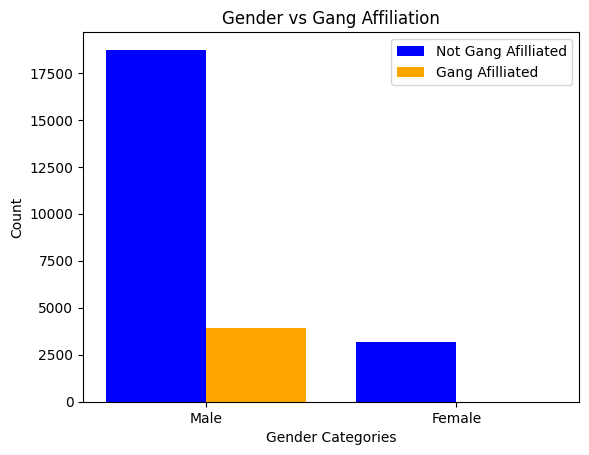

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2)
R = [18730, 3167]
N = [ 3938, 0]

width = 0.4

# plot data in grouped manner
plt.bar(x-0.2, R, width, color='blue')
plt.bar(x+0.2, N, width, color='orange')

plt.xticks(x, ['Male', 'Female'])
plt.xlabel("Gender Categories")
plt.ylabel("Count")
plt.legend(["Not Gang Afilliated", "Gang Afilliated"])
plt.title("Gender vs Gang Affiliation")
plt.show()

Age at release and Education/ number of Years spent in Prison

1.   What is the mean, median, mode for age?
2.   How many recieved at least some college degree?
3.   How does education, age, and number of years spent in prison correlate?



In [ ]:

df.groupby('Age_at_Release')['Recidivism_Within_3years'].value_counts()
# print(gender.get_group('M')['Gang_Affiliated'].value_counts())

# fil= ((df['Gender']=='F') & (df['Gang_Affiliated']=="TRUE"))
# df[fil]

Age_at_Release  Recidivism_Within_3years
18-22           True                        1487
                False                        579
23-27           True                        3438
                False                       1738
28-32           True                        3062
                False                       1920
33-37           True                        2445
                False                       1826
38-42           True                        1585
                False                       1408
43-47           True                        1326
                False                       1294
48 or older     False                       2166
                True                        1561
Name: Recidivism_Within_3years, dtype: int64

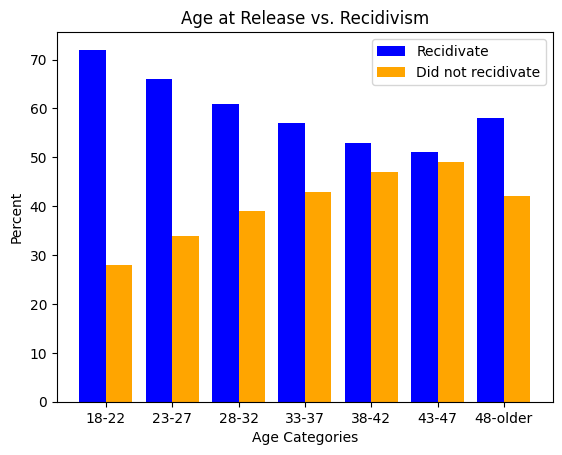

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(7)
R = [72, 66, 61, 57, 53,  51, 58]
N = [28, 34, 39, 43, 47, 49, 42]

width = 0.4

# plot data in grouped manner
plt.bar(x-0.2, R, width, color='blue')
plt.bar(x+0.2, N, width, color='orange')

plt.xticks(x, ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-older'])
plt.xlabel("Age Categories")
plt.ylabel("Percent")
plt.legend(["Recidivate", "Did not recidivate"])
plt.title("Age at Release vs. Recidivism")
plt.show()

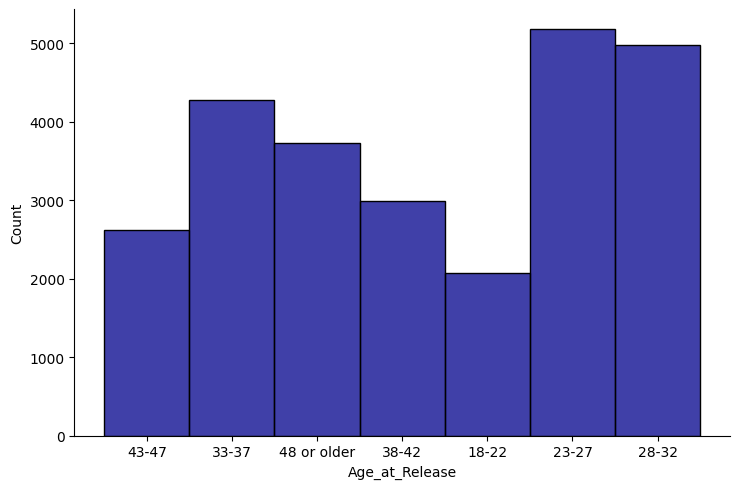

In [ ]:
sns.displot(data=df['Age_at_Release'], aspect = 1.5, color='darkblue')

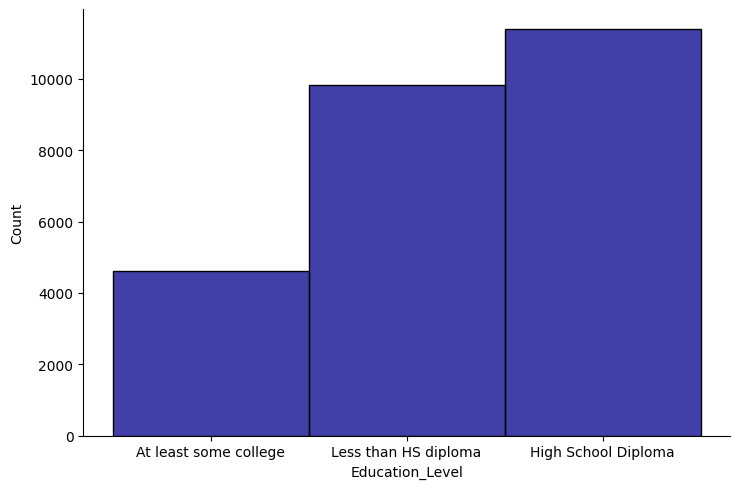

In [ ]:
#most offenders only have low level education
sns.displot(data=df['Education_Level'], aspect = 1.5, color='darkblue')

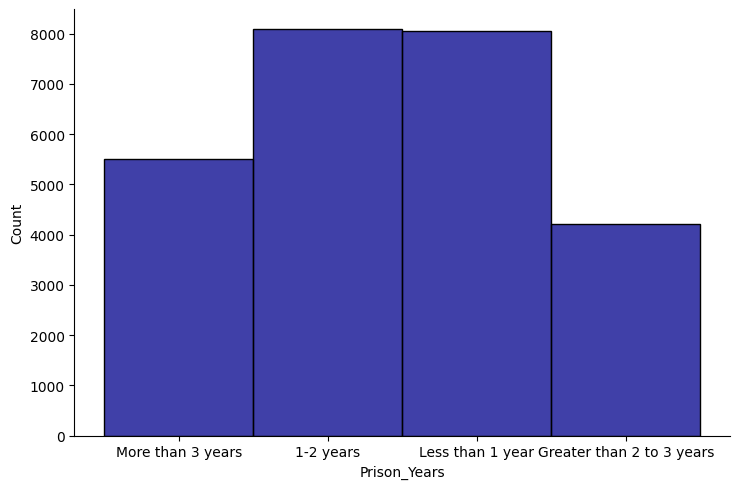

In [ ]:
#most have spend 1-2 years or less than a year in prison
sns.displot(data=df['Prison_Years'], aspect = 1.5, color='darkblue')

    Age Groups  less than high school  high school diploma  college
0        18-27                   3333                 3074      837
1        28-42                   4508                 5547     2191
2        43-47                    760                 1237      622
3  48 or older                   1239                 1532      955


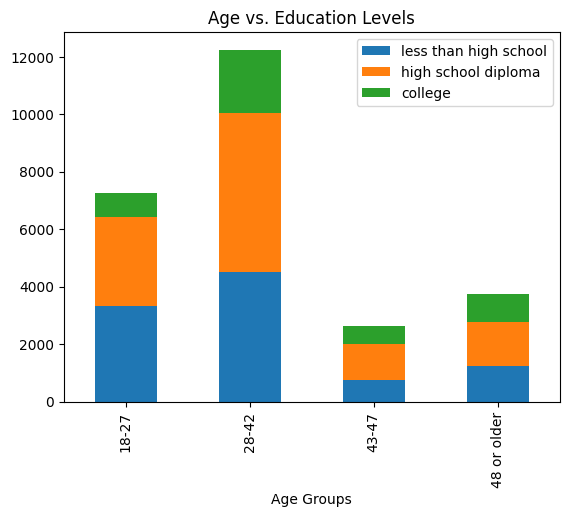

In [ ]:

df = pd.DataFrame([['18-27', 3333, 3074, 837
 ], ['28-42', 4508, 5547, 2191], ['43-47', 760, 1237, 622],
                   ['48 or older', 1239, 1532, 955]],
                  columns=['Age Groups', 'less than high school',  'high school diploma', 'college'])
# view data
print(df)

# plot data in stack manner of bar type
df.plot(x='Age Groups', kind='bar', stacked=True,
        title='Age vs. Education Levels')
plt.show()



Total arrests vs. total convictions

1.   Columns 13-25
2.   Look into external data about this as well



Supervision history vs. Supervision Risk


1.   Budget of law enforcements vs. total number arrests each year
2.   Does high supervision mean high risk score?
3.   Does high supervision mean lower parole and probation revocations?



# Correlation Matrix

In [ ]:
df.corr()

<ipython-input-4-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
ID,1.000000,-0.005842,0.086370,0.044098,-0.068377,-0.080422,-0.156316,-0.288929,-0.052931,-0.070400,...,-0.014516,0.008926,-0.023319,-0.003059,-0.048590,-0.007316,0.001072,0.000123,-0.013771,0.014181
Residence_PUMA,-0.005842,1.000000,-0.023978,-0.009605,0.014507,-0.026598,-0.012605,0.079729,0.003289,-0.022653,...,0.044354,0.003154,0.035102,0.044838,-0.007384,0.025203,0.016777,0.011005,0.001901,-0.011550
Gang_Affiliated,0.086370,-0.023978,1.000000,0.225902,-0.014644,0.051294,0.050069,-0.047293,0.003970,0.040023,...,0.028451,0.016439,-0.110306,-0.049822,-0.048108,0.185006,0.164616,0.039610,-0.001899,0.008678
Supervision_Risk_Score_First,0.044098,-0.009605,0.225902,1.000000,-0.050854,0.062732,-0.016489,0.006398,-0.023840,0.066140,...,0.043442,0.023814,-0.046978,0.033242,-0.077905,0.178494,0.138598,0.049340,0.020003,-0.011145
Prior_Arrest_Episodes_DVCharges,-0.068377,0.014507,-0.014644,-0.050854,1.000000,0.033687,0.281198,0.085504,0.506518,0.026405,...,0.040323,0.023359,-0.001704,0.011123,0.008400,0.065997,0.044163,0.029378,0.003915,0.001528
Prior_Arrest_Episodes_GunCharges,-0.080422,-0.026598,0.051294,0.062732,0.033687,1.000000,0.099198,0.042073,0.017908,0.551795,...,-0.005537,-0.003784,-0.006319,-0.012637,-0.024228,0.043663,0.025793,0.015305,0.013017,-0.010625
Prior_Conviction_Episodes_Viol,-0.156316,-0.012605,0.050069,-0.016489,0.281198,0.099198,1.000000,0.089750,0.367193,0.113235,...,-0.019873,0.007750,-0.015118,0.005316,0.018115,0.046686,0.039941,0.011746,0.000993,-0.000226
Prior_Conviction_Episodes_PPViolationCharges,-0.288929,0.079729,-0.047293,0.006398,0.085504,0.042073,0.089750,1.000000,0.086955,0.036715,...,0.060994,0.022003,-0.012442,0.004777,0.011116,0.095618,0.066516,0.026385,0.022298,0.003218
Prior_Conviction_Episodes_DomesticViolenceCharges,-0.052931,0.003289,0.003970,-0.023840,0.506518,0.017908,0.367193,0.086955,1.000000,0.026564,...,0.013803,0.011563,-0.008548,0.011275,0.005207,0.059327,0.039668,0.023413,0.007357,-0.006677
Prior_Conviction_Episodes_GunCharges,-0.070400,-0.022653,0.040023,0.066140,0.026405,0.551795,0.113235,0.036715,0.026564,1.000000,...,-0.006313,0.001399,0.006269,0.000920,-0.024283,0.030807,0.020132,0.008717,0.008884,-0.004196


# Data Cleaning
* note made some changes to combining columns so I could include the negative correlation cols


In [ ]:
#maps True/False to 1/0
df.replace({False: 0, True: 1}, inplace=True)


In [ ]:
#checks for null
df.isnull().sum()

ID                                                      0
Gender                                                  0
Race                                                    0
Age_at_Release                                          0
Residence_PUMA                                          0
Gang_Affiliated                                      3167
Supervision_Risk_Score_First                          475
Supervision_Level_First                              1720
Education_Level                                         0
Dependents                                              0
Prison_Offense                                       3277
Prison_Years                                            0
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_Violent                           0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_Episodes_Drug                              0
Prior_Arrest_E

Testing (does replaacing the missing values in drug tests affect the accuracy of model)?

With the missing values replaced: Accuracy is ________

Without the missing values replaced: Accuracy is ________

In [ ]:
#replaces missing values with the mode in certain columns, this exaggerates the features and makes the model stronger instead of leaving it is null

for column in ["Avg_Days_per_DrugTest", "DrugTests_THC_Positive", "DrugTests_Cocaine_Positive", "DrugTests_Meth_Positive", "DrugTests_Other_Positive", "Percent_Days_Employed", "Jobs_Per_Year", "Gang_Affiliated", "Supervision_Level_First", "Prison_Offense","Supervision_Risk_Score_First"]:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [ ]:
#converting all columns with "or  more" into int
for i in ['Dependents','Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
    'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Prop',
    'Prior_Conviction_Episodes_Drug', 'Delinquency_Reports', 'Program_Attendances', 'Residence_Changes']:
    df[i] = df[i].astype(str)
    df[i] = df[i].str.strip(' or more').astype(int)



In [ ]:
#replacing range of ages with averages

df['Age_at_Release'] = df['Age_at_Release'].replace('18-22', 20)
df['Age_at_Release'] = df['Age_at_Release'].replace('23-27', 25)
df['Age_at_Release'] = df['Age_at_Release'].replace('28-32', 30)
df['Age_at_Release'] = df['Age_at_Release'].replace('33-37', 35)
df['Age_at_Release'] = df['Age_at_Release'].replace('38-42', 40)
df['Age_at_Release'] = df['Age_at_Release'].replace('43-47', 45)
df['Age_at_Release'] = df['Age_at_Release'].replace('48 or older', 63) #average of 48 and Georgia life expectancy of 78




In [ ]:
df.shape

(25835, 54)

In [ ]:
#checking to see if we can delete columns not related
# corr=df.corr()
# corr['Recidivism_Within_3years']

In [ ]:
#NEW DATA FRAME with only necessary columns
df = pd.DataFrame(data=df, columns = ("Gender","Age_at_Release","Gang_Affiliated","Supervision_Risk_Score_First","Supervision_Level_First","Education_Level","Prison_Years","Prior_Arrest_Episodes_Felony","Prior_Arrest_Episodes_Misd","Prior_Arrest_Episodes_Property","Prior_Arrest_Episodes_Drug","Prior_Arrest_Episodes_PPViolationCharges","Prior_Arrest_Episodes_DVCharges","Prior_Conviction_Episodes_Felony","Prior_Conviction_Episodes_Misd","Prior_Conviction_Episodes_Prop","Prior_Conviction_Episodes_Drug","Prior_Conviction_Episodes_PPViolationCharges","Prior_Conviction_Episodes_DomesticViolenceCharges","Prior_Revocations_Parole","Condition_MH_SA","Violations_Instruction","Program_Attendances","Residence_Changes","DrugTests_THC_Positive","DrugTests_Cocaine_Positive","DrugTests_Meth_Positive","Percent_Days_Employed","Jobs_Per_Year","Employment_Exempt","Recidivism_Within_3years","Recidivism_Arrest_Year1","Recidivism_Arrest_Year2","Recidivism_Arrest_Year3"))

Combining columns


In [ ]:
# #combining drug tests by creating a new column
# for c in ['DrugTests_THC_Positive', 'DrugTests_Cocaine_Positive', 'DrugTests_Meth_Positive', 'DrugTests_Other_Positive']:
#   df["DrugTests_Postive"]= df['DrugTests_THC_Positive']+ df['DrugTests_Cocaine_Positive']+df['DrugTests_Meth_Positive']+df['DrugTests_Other_Positive']

In [ ]:
#DrugTests_THC_Positive has greatest corr with target, so we only keep that.

df.drop(['DrugTests_Cocaine_Positive', 'DrugTests_Meth_Positive'], axis=1, inplace=True)


In [ ]:
#combining prior arrest into one column
# for i in ['Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property','Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_DVCharges','Prior_Arrest_Episodes_GunCharges' ]:

#   df["Prior_Arrest_Episodes"]= df['Prior_Arrest_Episodes_Felony'] +df['Prior_Arrest_Episodes_Misd'] +df['Prior_Arrest_Episodes_Violent'] + df[ 'Prior_Arrest_Episodes_Property'] + df['Prior_Arrest_Episodes_Drug'] + df['Prior_Arrest_Episodes_PPViolationCharges'] + df['Prior_Arrest_Episodes_DVCharges'] + df['Prior_Arrest_Episodes_GunCharges']



In [ ]:
#Felony, Misd, Property, and PP violation have the most corr. Combine them. drop rest

for i in ['Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property','Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_DVCharges','Prior_Arrest_Episodes_GunCharges' ]:

  df["Prior_Arrest_Episodes"] = df['Prior_Arrest_Episodes_Felony'] +df['Prior_Arrest_Episodes_Misd'] + df[ 'Prior_Arrest_Episodes_Property'] + df['Prior_Arrest_Episodes_PPViolationCharges']

df.drop(['Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Property','Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges'], axis=1, inplace=True)


In [ ]:
#Fel, Misd, Prop have the most corr. Combine them. drop rest

for i in ['Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Viol ', 'Prior_Conviction_Episodes_Prop','Prior_Conviction_Episodes_Drug', 'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_DVCharges','Prior_Conviction_Episodes_GunCharges' ]:

  df["Prior_Conviction_Episodes"]= df['Prior_Conviction_Episodes_Misd']+ df[ 'Prior_Conviction_Episodes_Prop'] + df['Prior_Conviction_Episodes_PPViolationCharges']



In [ ]:
#dropping prior convctions
df.drop([ 'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Prop','Prior_Conviction_Episodes_Drug', 'Prior_Conviction_Episodes_PPViolationCharges'], axis=1, inplace=True)


In [ ]:
# #combining prior revocations and violations into one column
# for i in ['Prior_Revocations_Parole', 'Prior_Revocations_Probation', 'Violations_Instruction','Violations_FailToReport','Violations_MoveWithoutPermission'  ]:
#   df["Prior_revocations"]= df['Prior_Revocations_Parole'] +df['Prior_Revocations_Probation'] +df['Violations_Instruction']+df['Violations_FailToReport']+df['Violations_MoveWithoutPermission']

In [ ]:
# #dropping prior revocations and violations
# df.drop(['Prior_Revocations_Parole', 'Prior_Revocations_Probation', 'Violations_Instruction','Violations_FailToReport','Violations_MoveWithoutPermission'  ], axis=1, inplace=True)


In [ ]:
# #combining mental conditions into one column

# for i in ['Condition_MH_SA', 'Condition_Cog_Ed', 'Condition_Other'  ]:
#   df["Mental_Condition"]= df['Condition_MH_SA'] +df['Condition_Cog_Ed'] +df['Condition_Other']


In [ ]:
# #dropping mental
# df.drop(['Condition_MH_SA', 'Condition_Cog_Ed', 'Condition_Other'], axis=1, inplace=True)


In [ ]:
#changing strings to numerial values
#df['Prison_Offense'] = df['Prison_Offense'].replace({'Drug':0, 'Violent/Non-Sex':1, 'Property':2, 'Other':3, 'Violent/Sex':4})
df['Prison_Years'] = df['Prison_Years'].replace({'More than 3 years':3, '1-2 years':1.5, 'Less than 1 year':1, 'Greater than 2 to 3 years':2})
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})
# df['Race'] = df['Race'].replace({'BLACK': 0, 'WHITE': 1})
df['Education_Level'] = df['Education_Level'].replace({'Less than HS diploma':1, 'High School Diploma':2, 'At least some college':3})
df['Supervision_Level_First'] = df['Supervision_Level_First'].replace({'Standard':1, 'Specialized':2, 'High':3})

In [ ]:
df.drop(['Recidivism_Arrest_Year1','Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3'], axis=1, inplace=True)

In [ ]:
# df.drop(['Program_UnexcusedAbsences', 'Prison_Offense'], axis=1, inplace=True)

In [ ]:
corr=df.corr()
corr['Recidivism_Within_3years']

Gender                             -0.091976
Age_at_Release                     -0.175559
Gang_Affiliated                     0.184664
Supervision_Risk_Score_First        0.176826
Supervision_Level_First             0.088288
Education_Level                    -0.095131
Prison_Years                       -0.134025
Prior_Arrest_Episodes_DVCharges     0.065997
Prior_Conviction_Episodes_Felony    0.105448
Prior_Revocations_Parole            0.057612
Condition_MH_SA                     0.113856
Violations_Instruction              0.064350
Program_Attendances                -0.074435
Residence_Changes                   0.056924
DrugTests_THC_Positive              0.113949
Percent_Days_Employed              -0.214259
Jobs_Per_Year                      -0.014764
Employment_Exempt                  -0.050343
Recidivism_Within_3years            1.000000
Prior_Arrest_Episodes               0.233225
Prior_Conviction_Episodes           0.193549
Name: Recidivism_Within_3years, dtype: float64

# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('Recidivism_Within_3years', 1)
y = df[['Recidivism_Within_3years']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)


<ipython-input-25-9da450c2da75>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop('Recidivism_Within_3years', 1)


In [ ]:
#using metrics
Dtree = DecisionTreeClassifier(max_depth=4)
Dtree = Dtree.fit(x_train, y_train)


In [ ]:
val_predict = Dtree.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, val_predict))

Accuracy: 0.6836537221003741


In [ ]:
print(x.shape)
print(y.shape)

(25835, 20)
(25835, 1)


In [ ]:
print(x_test.shape)
print(x_train.shape)

print(y_test.shape)
print(y_train.shape)

(7751, 51)
(18084, 51)
(7751, 1)
(18084, 1)


In [ ]:
x_train.dtypes

ID                                                     int64
Gender                                                 int64
Race                                                   int64
Age_at_Release                                         int64
Residence_PUMA                                         int64
Gang_Affiliated                                      float64
Supervision_Risk_Score_First                         float64
Supervision_Level_First                                int64
Education_Level                                        int64
Dependents                                             int64
Prison_Years                                         float64
Prior_Arrest_Episodes_Felony                           int64
Prior_Arrest_Episodes_Misd                             int64
Prior_Arrest_Episodes_Violent                          int64
Prior_Arrest_Episodes_Property                         int64
Prior_Arrest_Episodes_Drug                             int64
Prior_Arrest_Episodes_PP

Text(0.5, 0, 'Max depth')

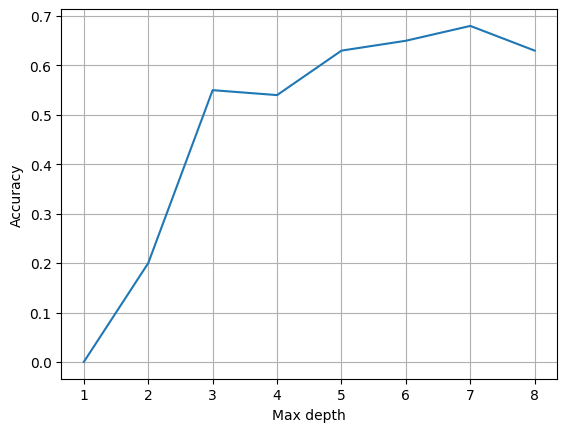

In [ ]:
# import matplotlib.pyplot as plt

# accuracy = [0, 0.2, 0.55, 0.54, 0.63, 0.65, 0.68, 0.63]
# max_depth = list(range(1, 9))

# plt.plot(max_depth, accuracy) #adds the line

# plt.grid() #adds a grid to the plot
# plt.ylabel('Accuracy') #xlabel
# plt.xlabel('Max depth') #ylabel

<Figure size 5000x2500 with 0 Axes>

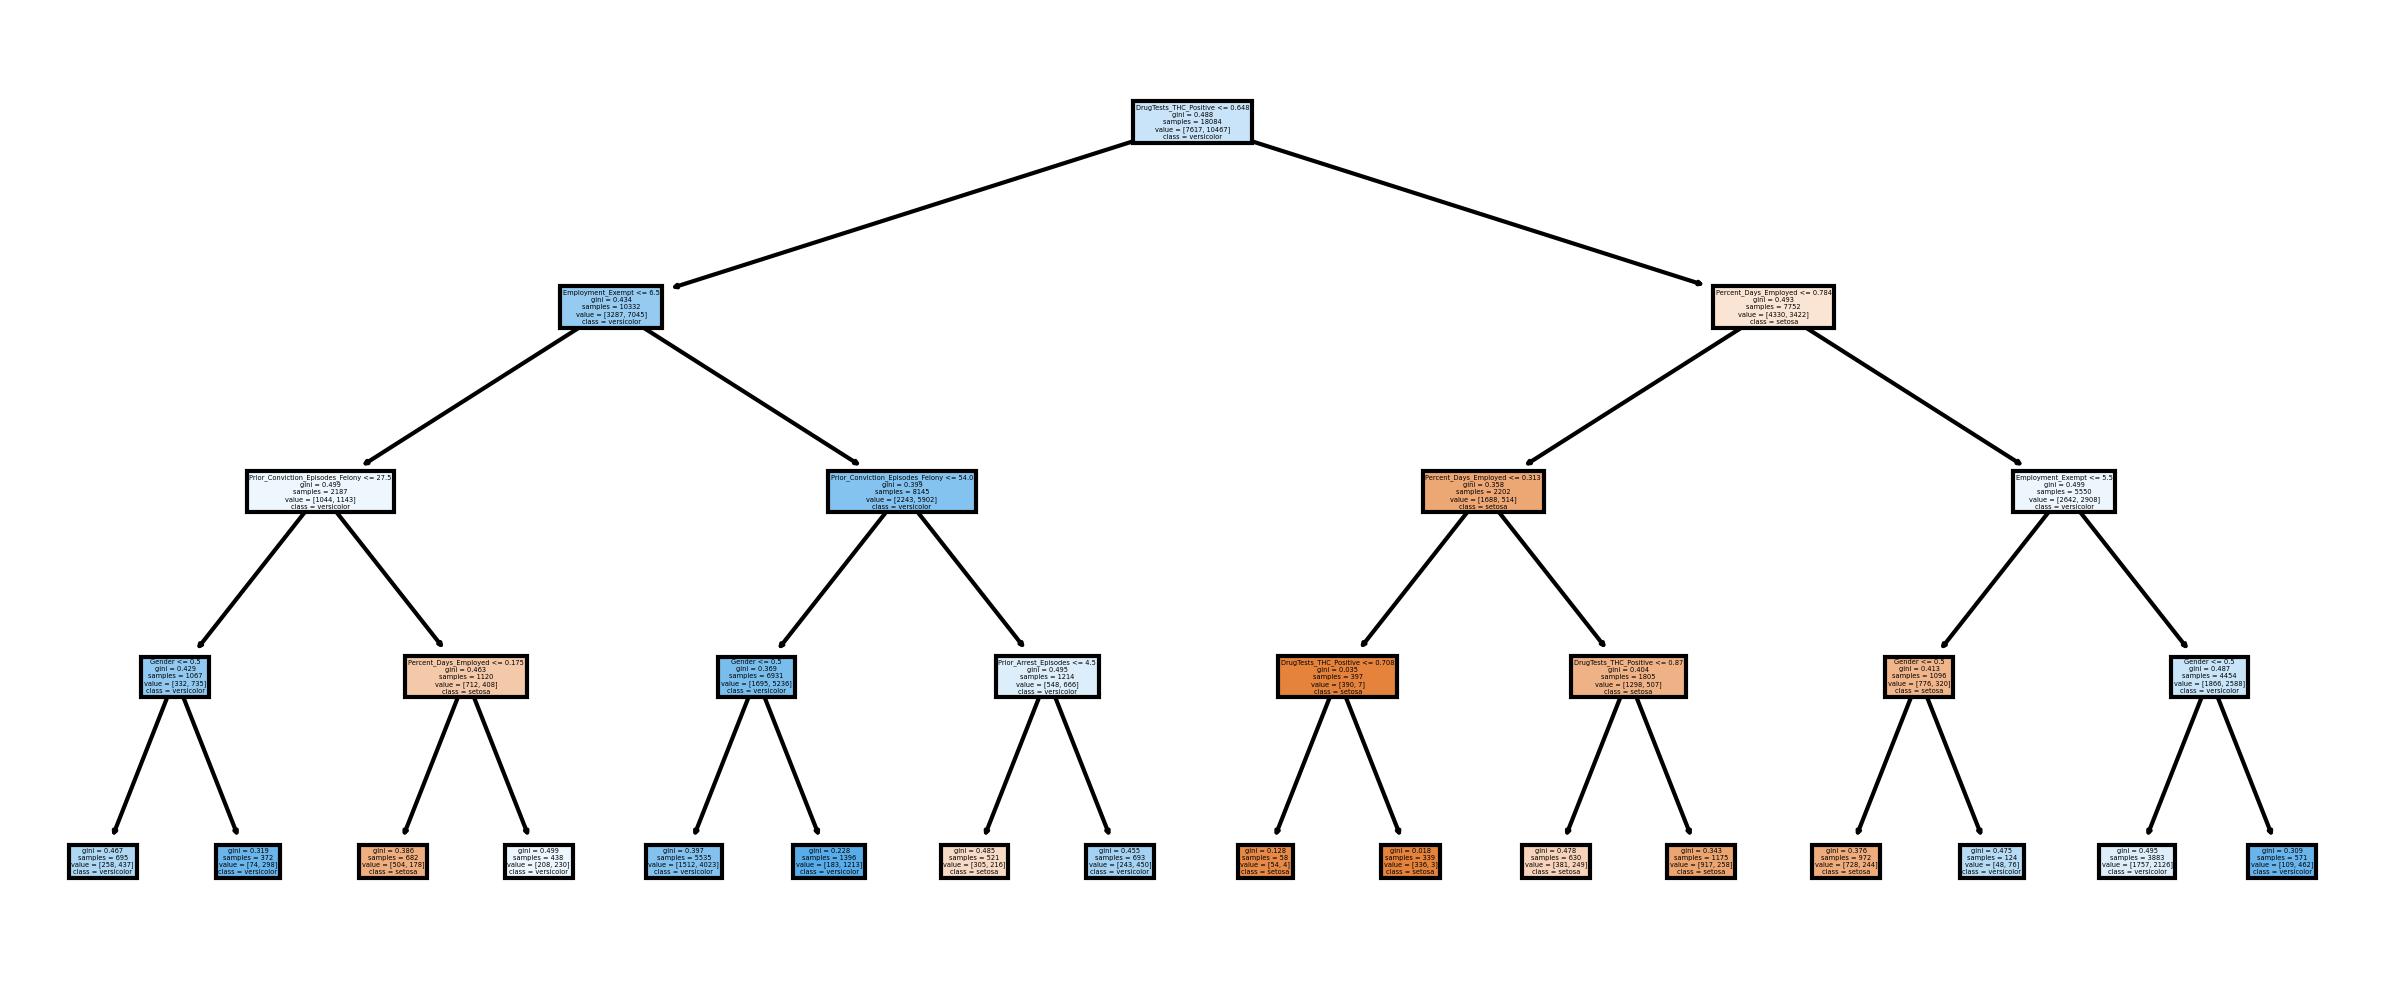

In [ ]:

plt.figure(figsize=(50, 25))
fn=['Prior_Arrest_Episodes_DVCharges','Prior_Conviction_Episodes_Felony','Gender', 'Age_at_Release', 'Gang_Affiliated', 'Supervision_Risk_Score_First', 'Supervision_Level_First',
'Education_Level','Prison_Years','Prior_Revocations_Parole', 'Condition_MH_SA', 'Violations_Instruction', 'Program_Attendances', 'Residence_Changes','Residence_Changes',
 'DrugTests_THC_Positive', 'Percent_Days_Employed', 'Jobs_Per_Year', 'Employment_Exempt', 'Prior_Arrest_Episodes', 'Prior_Conviction_Episodes']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4), dpi=300)
tree.plot_tree(Dtree,
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

Using Metrics and Accuracy

In [ ]:
#using metrics
Dtree = DecisionTreeClassifier(max_depth=4)
Dtree = Dtree.fit(x_train, y_train)
val_predict = Dtree.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, val_predict))

Accuracy: 0.6836537221003741


In [ ]:
from sklearn.metrics import precision_score

y_true = y_test
y_pred = Dtree.predict(x_test)
precision_score(y_true, y_pred, average='macro')

#sklearn.metrics module computes the precision of a classification model.
#ratio of true positives to the sum of true positives and false positives.
#try not to label as positive a sample that is negative, best 1, worst 0

0.6953138948755042

In [ ]:
a = df.drop('Recidivism_Within_3years', 1)
b = df[['Recidivism_Within_3years']]

<ipython-input-34-d41362359867>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  a = df.drop('Recidivism_Within_3years', 1)


In [ ]:
#Accuracy for different test train splits
splitratio = [0.10, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
accuracies = []
for i in splitratio:
  a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=i, random_state=25)
  model = DecisionTreeClassifier(max_depth=3)
  model = model.fit(a_train, b_train)
  prediction = model.predict(a_test)
  accuracies.append(metrics.accuracy_score(b_test, prediction))

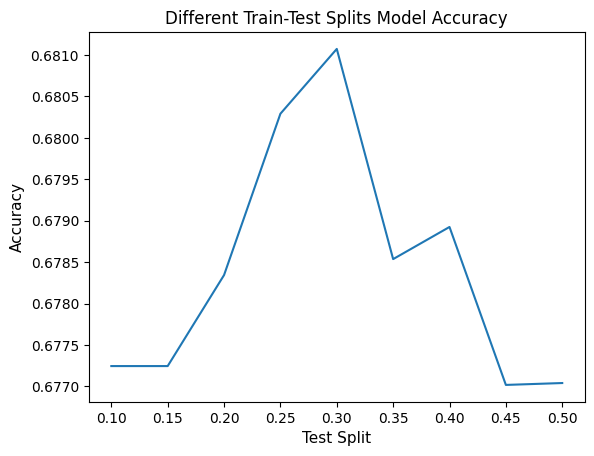

In [ ]:
x = splitratio
y = accuracies

plt.plot(x, y)
plt.title('Different Train-Test Splits Model Accuracy')
plt.xlabel('Test Split', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.show()

In [ ]:
#max depth vs accuracy
max = np.arange(2, 11)
taccuracy = []
vaccuracy = []

for i in max:
  dtc = DecisionTreeClassifier(max_depth=i)
  dtc = dtc.fit(a_train, b_train)
  taccuracy.append(dtc.score(a_train, b_train))
  val_predict = dtc.predict(a_test)
  vaccuracy.append(metrics.accuracy_score(b_test, val_predict))


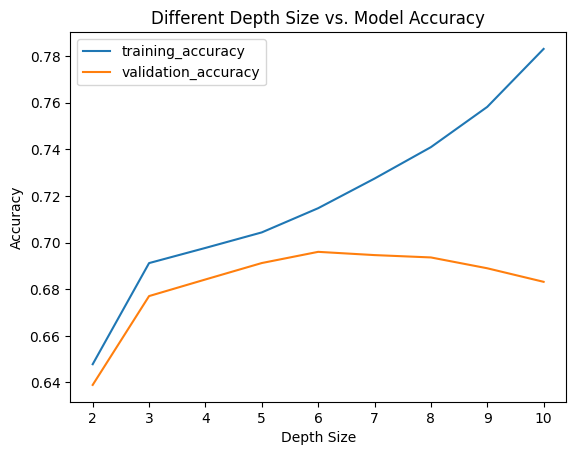

In [ ]:
x = max
plt.plot(x, taccuracy, label = "training_accuracy")
plt.plot(x, vaccuracy, label = "validation_accuracy")
plt.title('Different Depth Size vs. Model Accuracy')
plt.xlabel("Depth Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#Optimizing Decision Tree Performance Using Criterion Parameter

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", splitter= "best", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6957811895239324


# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
pred = rf.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.7204231712037157


In [ ]:
x_train.columns = ["Prior_Arrest_Episodes_DVCharges","Prior_Conviction_Episodes_Felony","Gender","Age_at_Release","Gang_Affiliated","Supervision_Risk_Score_First","Supervision_Level_First","Education_Level","Prison_Years","Prior_Revocations_Parole", "Condition_MH_SA", "Violations_Instruction", "Program_Attendances", "Residence_Changes", "DrugTests_THC_Positive", "Percent_Days_Employed", 'Jobs_Per_Year', "Employment_Exempt", "Prior_Arrest_Episodes", "Prior_Conviction_Episodes"]

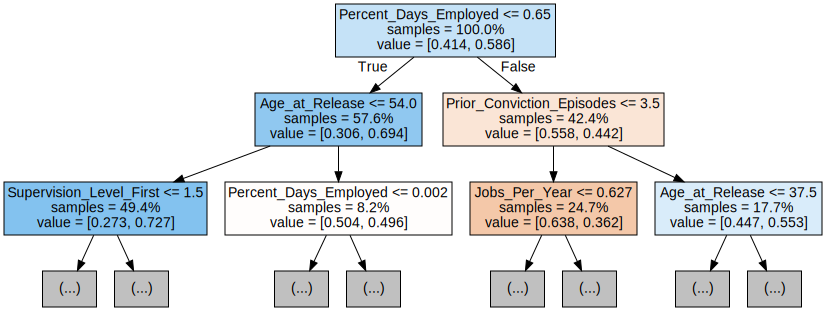

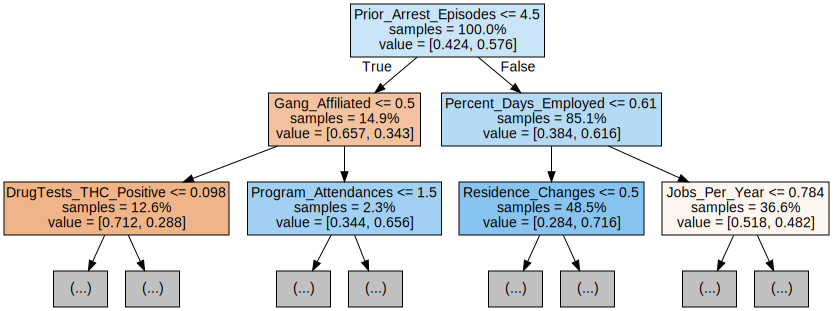

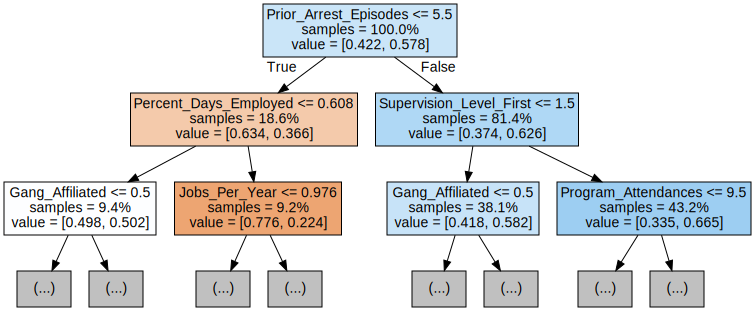

In [ ]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
param = {'n_estimators': randint(50,500), #n_estimators: the number of decision trees in the forest. Increasing generally improves the performance of the model
              'max_depth': randint(1,20)}

# Create a random forest
rf = RandomForestClassifier()

# Use random search to find best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)


KeyboardInterrupt: ignored

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

print(f'Best hyperparameters: {rand_search.best_params_}')


Best hyperparameters: {'max_depth': 10, 'n_estimators': 409}


In [ ]:
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7204231712037157


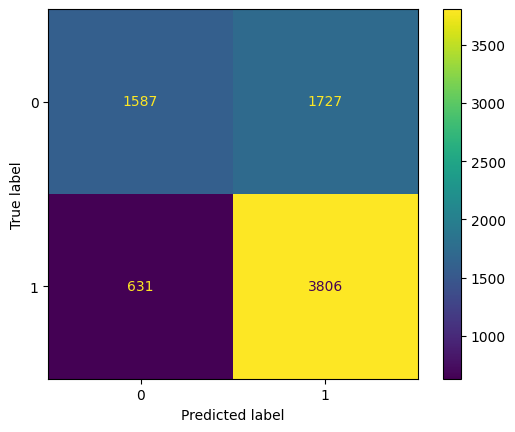

In [ ]:
# Generate predictions with the best model


# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Text(0, 0.5, 'Feature Coefficients')

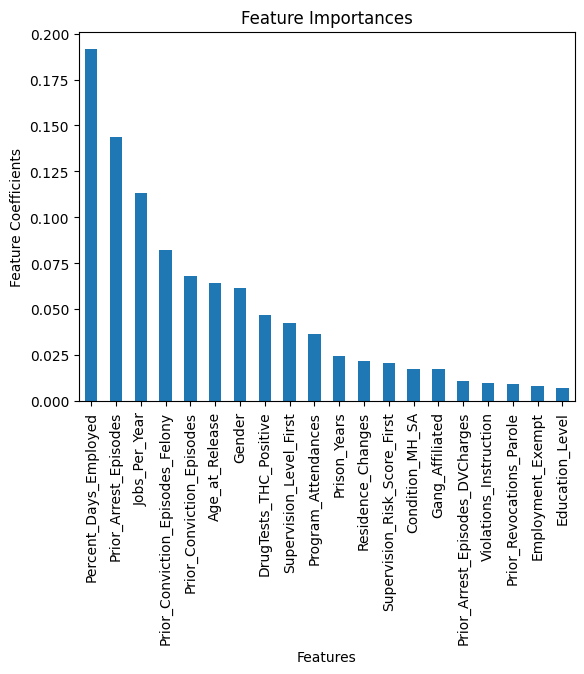

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();
plt.title("Feature Importances")

plt.xlabel("Features")
plt.ylabel("Feature Coefficients")

# Gradient Boosted Trees

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt


In [ ]:
# split data into X and y
A = df.drop('Recidivism_Within_3years', 1)
B = df[['Recidivism_Within_3years']]
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3, random_state=25)

# fit model no training data
model = XGBClassifier()
model.fit(A, B)


<ipython-input-40-302f16f54398>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  A = df.drop('Recidivism_Within_3years', 1)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

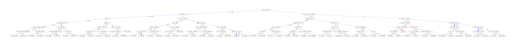

In [ ]:
# plot single tree
plot_tree(model, num_trees=4)
plt.show()

In [ ]:
accuracy_score(B_test, model.predict(A_test))

0.8367952522255193

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

Gradient Boosted (part 2)

In [ ]:
# # Scale the data
# scaler = preprocessing.StandardScaler().fit(x_train)
# x_train_transformed = scaler.transform(x_train)
# x_test_transformed = scaler.transform(x_test)

In [ ]:
# Define Gradient Boosting Classifier with hyperparameters
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
# Fit train data to GBC
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [ ]:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None,
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

GradientBoostingClassifier(learning_rate=0.05, loss='deviance', max_features=5,
                           n_estimators=500, random_state=100)

In [ ]:
# Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(y_test, gbc.predict(x_test)))



[[2006 1308]
 [ 768 3669]]


In [ ]:
accuracy_score(y_test, gbc.predict(x_test))

0.7321635917946071

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

#https://towardsdatascience.com/interpreting-roc-curve-and-roc-auc-for-classification-evaluation-28ec3983f077

0.6511713509688173

Hyperparameter tuning for gradient boost model

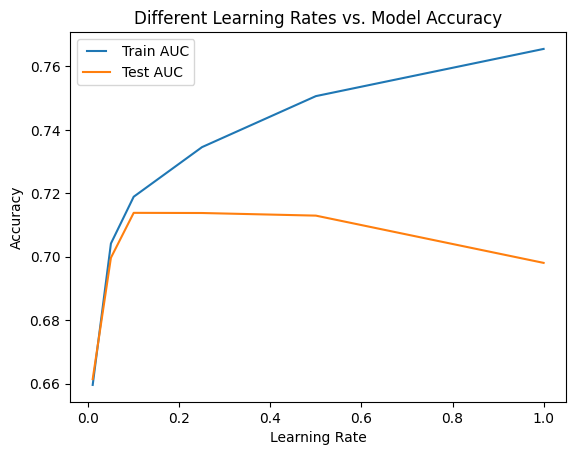

In [ ]:
#learning rates
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, label= "Train AUC")
line2, = plt.plot(learning_rates, test_results, label= "Test AUC")
plt.title('Different Learning Rates vs. Model Accuracy')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.show()

#high learning rate results in overfitting. Optimal learning rate is around 0.15

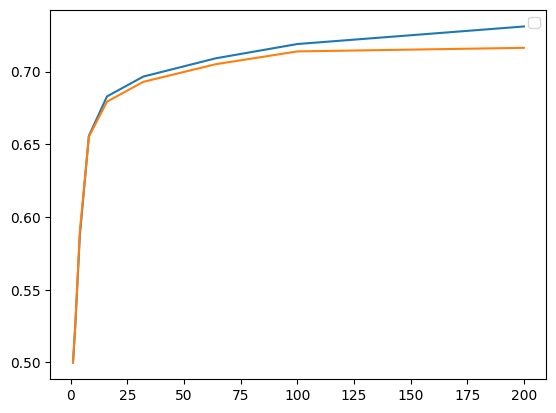

In [ ]:
#number of estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results)
line2, = plt.plot(n_estimators, test_results)
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})


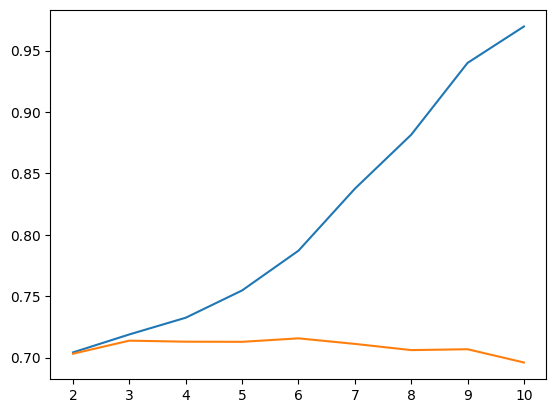

In [ ]:
#max depth
max_depths = np.arange(2, 11)
train_results = []
test_results = []
for i in max_depths:
   model = GradientBoostingClassifier(max_depth=i)
   model.fit(x_train, y_train)

   #predict for training
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   #predict for test
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results)
line2, = plt.plot(max_depths, test_results)

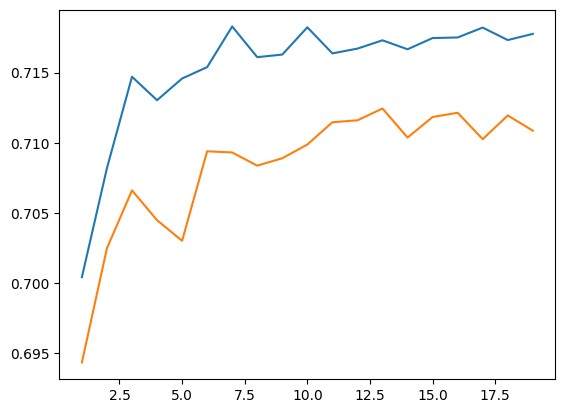

In [ ]:
#max features
max_features = list(range(1, 20))
train_results = []
test_results = []
for max_feature in max_features:
   model = GradientBoostingClassifier(max_features=max_feature)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results)
line2, = plt.plot(max_features, test_results)


In [ ]:
param = {'n_estimators': randint(50,500), #n_estimators: the number of decision trees in the forest. Increasing generally improves the performance of the model
              'max_depth': randint(1,20),
    "learning_rate":[0.01,0.1,1,10,100],
         'max_features': randint(1,20),
         'max_leaf_nodes': randint(1,50),
         'min_samples_leaf':randint(1,50)
}
          # learning_rate, subsample, n_estimators and max_depth

# Create a random forest
gb = GradientBoostingClassifier()

# Use random search to find best hyperparameters
rand = RandomizedSearchCV(gb,param_distributions = param, n_iter=5,cv=5)

# Fit the random search object to the data
rand.fit(x_train, y_train)



RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9be8489840>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9ba224c610>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9ba224edd0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9ba224cca0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9ba224feb0>})

In [ ]:

# Create a variable for the best model
best_gb = rand.best_estimator_

print(f'Best hyperparameters: {rand.best_params_}')

Best hyperparameters: {'learning_rate': 1, 'max_depth': 15, 'max_features': 11, 'max_leaf_nodes': 20, 'min_samples_leaf': 38, 'n_estimators': 412}


Testing the hyperparameters

In [ ]:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=11, max_leaf_nodes=None,
                           min_impurity_decrease=0.0,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None,
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)






GradientBoostingClassifier(loss='deviance', max_features=11, n_estimators=500,
                           random_state=100)

In [ ]:
# Define Gradient Boosting Classifier with hyperparameters
final=GradientBoostingClassifier()
# Fit train data to GBC
final.fit(x_train_transformed, y_train)

GradientBoostingClassifier()

In [ ]:
accuracy_score(y_test, final.predict(x_test_transformed))

NameError: ignored

In [ ]:
#max depth vs accuracy
max = np.arange(2, 11)
taccuracy = []
vaccuracy = []

for i in max:
  dtc = DecisionTreeClassifier(max_depth=i)
  dtc = dtc.fit(a_train, b_train)
  taccuracy.append(dtc.score(a_train, b_train))
  val_predict = dtc.predict(a_test)
  vaccuracy.append(metrics.accuracy_score(b_test, val_predict))

  x = max
plt.plot(x, taccuracy, label = "training_accuracy")
plt.plot(x, vaccuracy, label = "validation_accuracy")
plt.title('Different Depth Size vs. Model Accuracy')
plt.xlabel("Depth Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Test-Train-Validation

In [ ]:
# # 80-10-10 train-test-val split
# x_train, x_testval, y_train, y_testval = train_test_split(x, y, test_size=0.2)
# x_test, x_val, y_test, y_val = train_test_split(x_testval, y_testval, test_size = 0.5)

# #initialize the tree
# tree = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=48)
# tree = tree.fit(x_train, y_train)

# #validation data
# preval = tree.predict(x_val)
# accval = metrics.accuracy_score(y_val, val_predict)
# print(f'Validation Accuracy: {accval}')

# #test data
# predict = tree.predict(x_test)
# acc = metrics.accuracy_score(y_test, predict)
# print(f'Testing Accuracy: {acc}')

# Additional Datasets

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
# total population in counties https://www.ojp.gov/pdffiles1/nij/grants/305034.pdf
# percent of high school graduation in counties
# amount of money allocated to police and schooling
#Correlation with gang affiliation, gang activities vs crime locations, gender ratio in gangs vs the criminal data,
# amount of money allocated to police and schooling

In [ ]:
dfl = pd.read_excel("External.xlsx")


In [ ]:
# print("Median Income Per Capita: ", .get_group('2020 Per Capita Income as a Percent of Georgia Total').mean())

Population in Georgia vs. number of crimes

In [ ]:
from google.colab import files
uploaded = files.upload()